In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

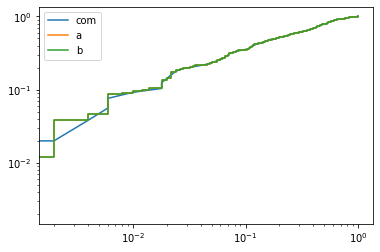

In [102]:
x = np.arange(0,1000)
y = np.where(x<500, 0, 1)

a = x + np.random.normal(0,500,1000)
b = x + np.random.normal(0,500,1000)
b=a
# print(a)
# print(b)

# a_q = np.quantile(a, 0.5)
# b_q = np.quantile(b, 0.5)
# 
# idx = np.where(a<a_q, 0,1)
# idx2 = np.where(b<b_q, 0,1)
# print(idx)
# print(idx2)

def roc(a,b,y_true):
    tpr = np.empty(0)
    fpr = np.empty(0)
    
    for q in np.linspace(0.00,1,100):
        a_q = np.quantile(a, q)
        b_q = np.quantile(b, q)
        
        a_pred = np.where(a<a_q, 0,1)
        b_pred = np.where(b<b_q, 0,1)
        
        pred = a_pred*b_pred
        
        tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
        
        tpr=np.append(tpr,tp/500.)
        fpr=np.append(fpr,fp/500.)
        
    return tpr,fpr

tpr,fpr= roc(a,b,y)
plt.loglog(fpr,tpr, label='com')

fpr,tpr,_=roc_curve(y,a)
plt.loglog(fpr,tpr,label='a')

fpr,tpr,_=roc_curve(y,b)
plt.loglog(fpr,tpr,label='b')
plt.legend()
plt.show()